# Deep leanring project

## 1 Data loading and argumenting

In [1]:
##### before running it, make sure you don't have lots of big files in your google drive
##### otherwise it's going to take too long to finish running it before giving the TIMEOUT error
##### also save the train_controls, train_patients, val_controls, val_patients to your drive and
##### create a "train" folder with train_controls, train_patients in it, and 
##### a "val" folder with val_controls, val_patients in it.
##### change the train_dir and val_dir in the next cell to the dir of your train and val folder

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## 1.1 Seeds and predefined stuffs

In [0]:
from numpy.random import seed
seed(137)
from tensorflow import set_random_seed
set_random_seed(191)

# Dir (Comment out others when you run the code)
# e.g. /gdrive/My Drive/deep_learning/new_dataset/test/controls/View2098.jpg
#          |                                             |

# Kavi's

# Daniel's

# Chelsea's 
train_dir = "/gdrive/My Drive/deep_learning/new_dataset/train"
val_dir = "/gdrive/My Drive/deep_learning/new_dataset/val"
test_dir = "/gdrive/My Drive/deep_learning/new_dataset/test"


img_width = 600
img_height = 450
batch_size = 5
channels = 3
nb_train_samples = 287
nb_validation_samples = 93

## 1.2 Data loading

In [48]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
val_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(img_width, img_height),
        batch_size=batch_size,
        shuffle = True,
        class_mode='binary')   

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle = True,
    class_mode='binary') #weight toward one class or another

#Keras takes care of generating labels if the directory structure matches above!
label_mapT = train_generator.class_indices
print(label_mapT)

label_mapV = validation_generator.class_indices
print(label_mapV)

for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    #print(data_batch)
    print('labels batch shape:', labels_batch.shape)
    #print(labels_batch)
    break

Found 410 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
{'controls': 0, 'patients': 1}
{'controls': 0, 'patients': 1}
data batch shape: (5, 600, 450, 3)
labels batch shape: (5,)


## 2 Model training

In [0]:
import numpy as np 
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Softmax, Flatten, Dense, BatchNormalization 
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from keras.models import Sequential

from keras.callbacks import TensorBoard

#from keras.layers import Input, Dense
from keras.models import Model

input_shape = (img_width, img_height, channels)

model = Sequential()

model.add(Conv2D(32,(3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(32,(3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(64,(3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 598, 448, 32)      896       
_________________________________________________________________
activation_71 (Activation)   (None, 598, 448, 32)      0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 299, 224, 32)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 297, 222, 32)      9248      
_________________________________________________________________
activation_72 (Activation)   (None, 297, 222, 32)      0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 148, 111, 32)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 146, 109, 64)      18496     
__________

In [50]:
epochs = 30

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    shuffle=True)

Epoch 1/30
57/57 [==============================] - 10s 168ms/step - loss: 2.7987 - acc: 0.6491 - val_loss: 0.8251 - val_acc: 0.6556
Epoch 2/30
57/57 [==============================] - 7s 114ms/step - loss: 0.4295 - acc: 0.8351 - val_loss: 0.3518 - val_acc: 0.8556
Epoch 3/30
57/57 [==============================] - 6s 113ms/step - loss: 0.4065 - acc: 0.8947 - val_loss: 0.5967 - val_acc: 0.8111
Epoch 4/30
57/57 [==============================] - 7s 116ms/step - loss: 0.3428 - acc: 0.8702 - val_loss: 0.4689 - val_acc: 0.8444
Epoch 5/30
57/57 [==============================] - 7s 115ms/step - loss: 0.3725 - acc: 0.8947 - val_loss: 0.4741 - val_acc: 0.8667
Epoch 6/30
57/57 [==============================] - 7s 117ms/step - loss: 0.2359 - acc: 0.9193 - val_loss: 0.4967 - val_acc: 0.8333
Epoch 7/30
57/57 [==============================] - 6s 114ms/step - loss: 0.1988 - acc: 0.9228 - val_loss: 0.7894 - val_acc: 0.8444
Epoch 8/30
57/57 [==============================] - 6s 113ms/step - loss: 0

KeyboardInterrupt: ignored

## 3 Prediction

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        color_mode="rgb",
        class_mode="binary",
        shuffle=False,
        batch_size=batch_size)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples / batch_size))
    
# Getting binary prediction
predict = np.round_(predict)

model.evaluate_generator(test_generator, steps = np.ceil(nb_samples / batch_size))

Found 202 images belonging to 2 classes.


[1.263062293127966, 0.8415841660139585]

## 4 Model visualization

## 1 Preamble downlaoding

In [53]:
!pip install git+https://github.com/raghakot/keras-vis.git

from keras.applications import ResNet50
from vis.utils import utils
from keras import activations

# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-__i8adxf
  Running setup.py bdist_wheel for keras-vis ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-wu9gulgn/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis


## 2 Display images (to make sure the intended ones are shown)

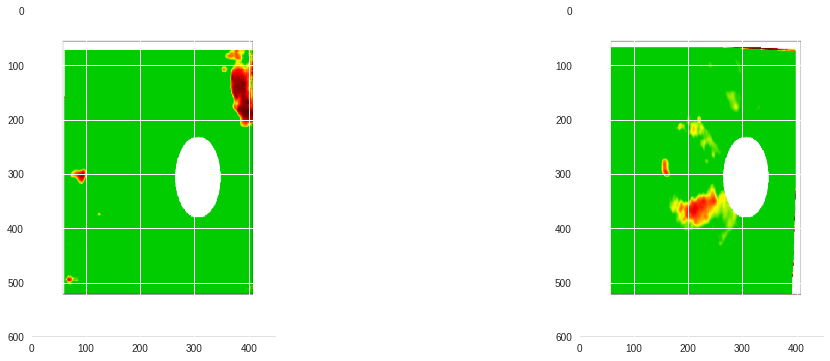

In [65]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)


img1 = utils.load_img(test_dir + '/controls/View2098.png', target_size=(img_width, img_height))
img2 = utils.load_img(test_dir + '/patients/19105.png', target_size=(img_width, img_height))


f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

### 3 Attention heatmap displayed on the gray-scale image

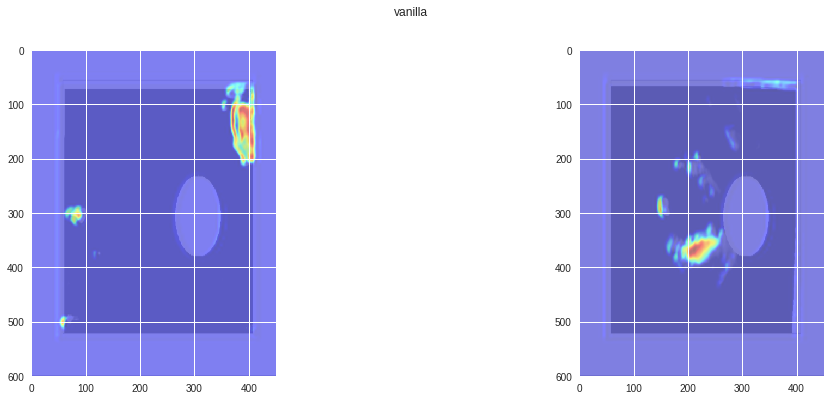

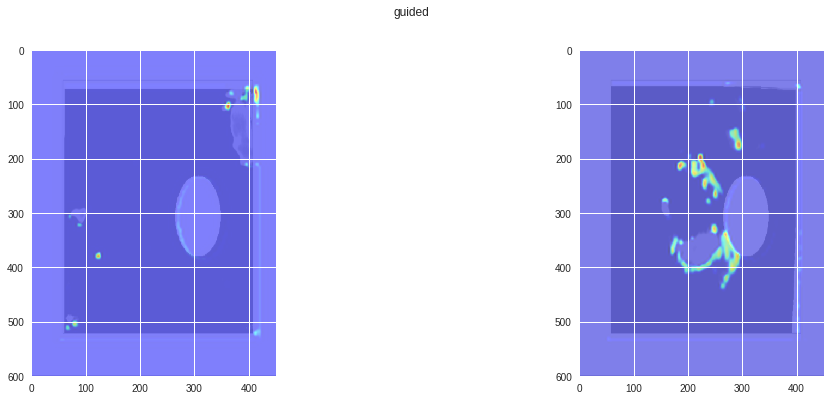

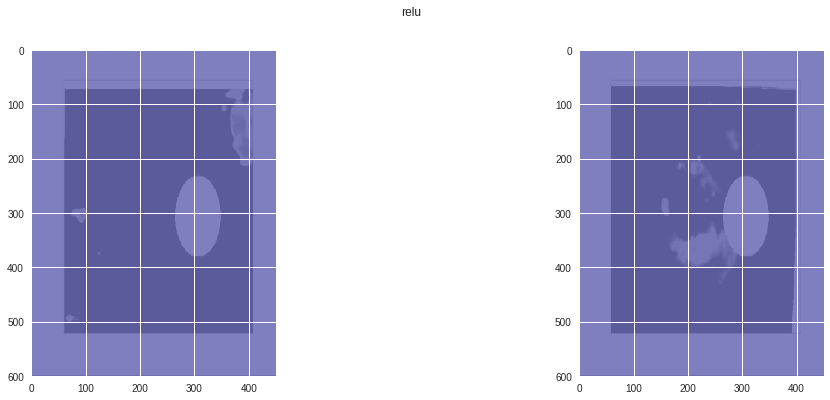

In [69]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_cam
import matplotlib.cm as cm

# Convert RBG to Grey-scale
def converter(x):
    #x has shape (width, height, channels)
    return (0.21 * x[:,:,:1]) + (0.72 * x[:,1:2]) + (0.07 * x[:,:,-1:])

penultimate_layer = utils.find_layer_idx(model, 'conv2d_45')
layer_idx = utils.find_layer_idx(model, 'dense_29')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        
        grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        grey_img = converter(img)

        ax[i].imshow(overlay(jet_heatmap, grey_img))

### 3 Attention heatmap displayed on the origin image

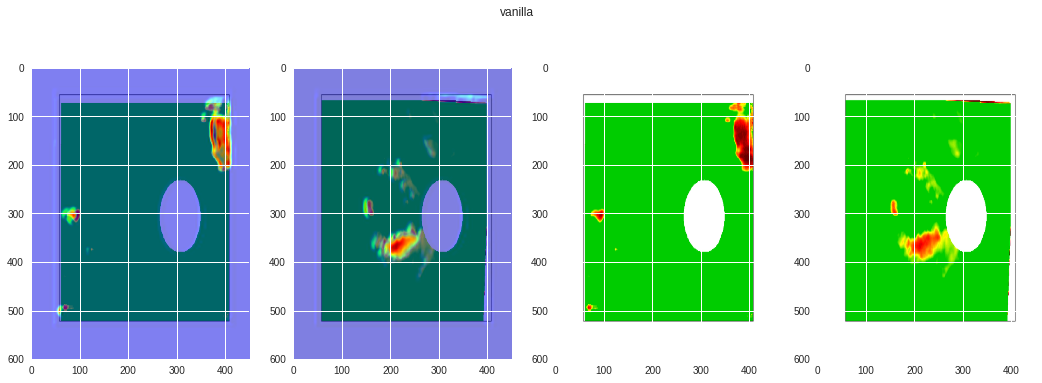

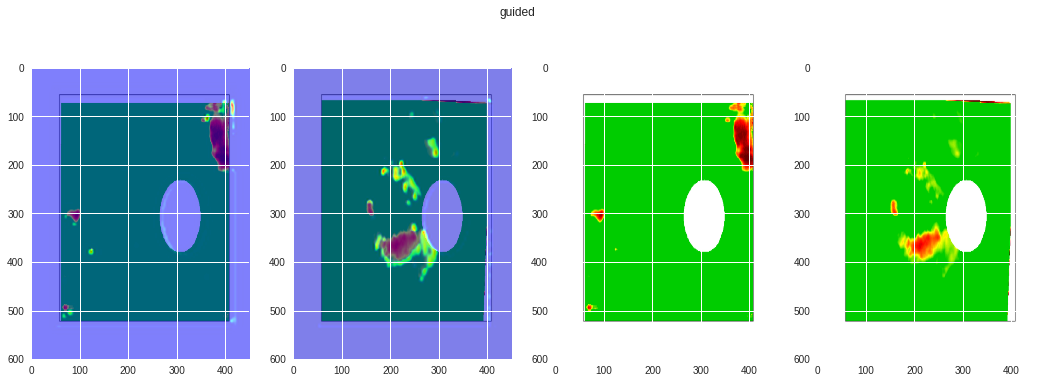

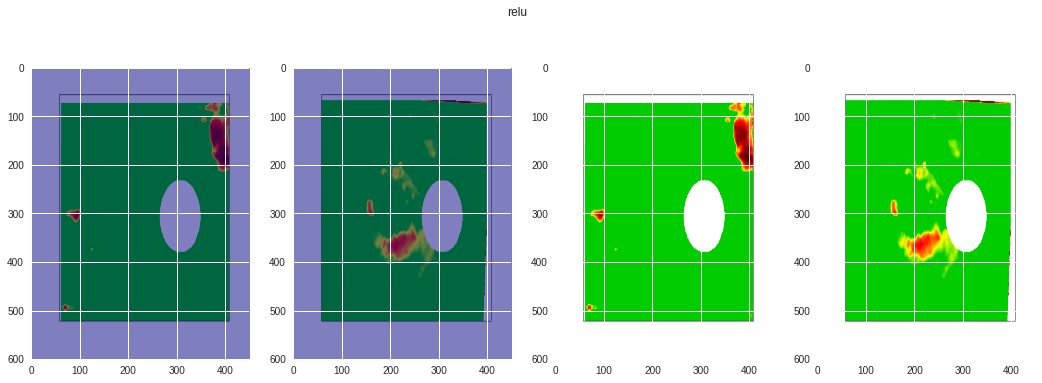

In [70]:
for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 4)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))
        ax[i + 2].imshow(img)